In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-03-28 09:56:57.016968: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 22s 739ms/step - accuracy: 0.2422 - loss: 1.8245
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2137 - loss: 1.8181 - val_accuracy: 0.3386 - val_loss: 1.6790
Epoch 2/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.2656 - loss: 1.7357
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3001 - loss: 1.6948 - val_accuracy: 0.3633 - val_loss: 1.5879
Epoch 3/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.2969 - loss: 1.6307
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3279 - loss: 1.6205 - val_accuracy: 0.4772 - val_loss: 1.5074
Epoch 4/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.4453 - loss: 1.5287
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3982 - loss: 1.5391 - val_accuracy: 0.5176 - val_loss: 1.4182
Epoch 5/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.3281 - loss: 1.5965
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3983 - loss: 1.4985 - val_accuracy: 0.5873 - val_loss: 1.3311
Epoch 6/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.3750 - loss: 1.4649
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4315 - loss: 1.4227 - val_accuracy: 0.5970 - val_loss: 1.2347
Epoch 7/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.4219 - loss: 1.3990
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4562 - loss: 1.3514 - val_accuracy: 0.6112 - val_loss: 1.1507
Epoch 8/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.4844 - loss: 1.2679
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4868 - loss: 1.2774 - val_accuracy: 0.6442 - val_loss: 1.0789
Epoch 9/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.4609 - loss: 1.2783
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4923 - loss: 1.2484 - val_accuracy: 0.6614 - val_loss: 1.0205
Epoch 10/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.4844 - loss: 1.2768
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5268 - loss: 1.1871 - val_accuracy: 0.6757 - val_loss: 0.9683
Epoch 11/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.5312 - loss: 1.1599
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5115 - loss: 1.1748 - val_accuracy: 0.6996 - val_loss: 0.9257
Epoch 12/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5547 - loss: 1.1344
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5276 - loss: 1.1410 - val_accuracy: 0.7079 - val_loss: 0.8822
Epoch 13/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.5547 - loss: 0.9967
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5556 - loss: 1.0779 - val_accuracy: 0.7116 - val_loss: 0.8443
Epoch 14/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5938 - loss: 1.1076
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5605 - loss: 1.0767 - val_accuracy: 0.7236 - val_loss: 0.8168
Epoch 15/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5781 - loss: 1.0214
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5745 - loss: 1.0425 - val_accuracy: 0.7416 - val_loss: 0.7853
Epoch 16/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5469 - loss: 1.0798
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5692 - loss: 1.0279 - val_accuracy: 0.7476 - val_loss: 0.7517
Epoch 17/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5312 - loss: 1.0027
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5869 - loss: 1.0084 - val_accuracy: 0.7551 - val_loss: 0.7285
Epoch 18/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6016 - loss: 1.0113
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5897 - loss: 0.9849 - val_accuracy: 0.8232 - val_loss: 0.7020
Epoch 19/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.5078 - loss: 1.0707
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5888 - loss: 0.9748 - val_accuracy: 0.8277 - val_loss: 0.6748
Epoch 20/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6250 - loss: 0.8747
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6004 - loss: 0.9677 - val_accuracy: 0.8412 - val_loss: 0.6601
Epoch 21/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.5391 - loss: 0.9557
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5882 - loss: 0.9482 - val_accuracy: 0.8382 - val_loss: 0.6419
Epoch 22/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.6406 - loss: 0.8839
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6274 - loss: 0.9143 - val_accuracy: 0.8637 - val_loss: 0.6257
Epoch 23/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.5781 - loss: 0.9383
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6205 - loss: 0.9226 - val_accuracy: 0.8884 - val_loss: 0.5996
Epoch 24/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5469 - loss: 0.9321
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6218 - loss: 0.9172 - val_accuracy: 0.8824 - val_loss: 0.5909
Epoch 25/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6484 - loss: 0.8752
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6371 - loss: 0.8935 - val_accuracy: 0.8899 - val_loss: 0.5729
Epoch 26/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6328 - loss: 0.8444
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6427 - loss: 0.8693 - val_accuracy: 0.8906 - val_loss: 0.5600
Epoch 27/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6094 - loss: 0.9165
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6612 - loss: 0.8640 - val_accuracy: 0.8861 - val_loss: 0.5396
Epoch 28/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6094 - loss: 0.9044
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6602 - loss: 0.8607 - val_accuracy: 0.8839 - val_loss: 0.5261
Epoch 29/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7031 - loss: 0.8569
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6780 - loss: 0.8312 - val_accuracy: 0.8854 - val_loss: 0.5104
Epoch 30/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6562 - loss: 0.8053
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6716 - loss: 0.8361 - val_accuracy: 0.8816 - val_loss: 0.5111
Epoch 31/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7266 - loss: 0.7803
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6724 - loss: 0.8197 - val_accuracy: 0.8884 - val_loss: 0.4955
Epoch 32/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7422 - loss: 0.7318
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6847 - loss: 0.8022 - val_accuracy: 0.8831 - val_loss: 0.4799
Epoch 33/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7188 - loss: 0.7549
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6850 - loss: 0.8070 - val_accuracy: 0.8824 - val_loss: 0.4681
Epoch 34/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6641 - loss: 0.8133
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6862 - loss: 0.7933 - val_accuracy: 0.8831 - val_loss: 0.4606
Epoch 35/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7266 - loss: 0.6596
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6988 - loss: 0.7658 - val_accuracy: 0.8801 - val_loss: 0.4526
Epoch 36/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7344 - loss: 0.7746
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7064 - loss: 0.7839 - val_accuracy: 0.8854 - val_loss: 0.4444
Epoch 37/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7422 - loss: 0.6552
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6936 - loss: 0.7694 - val_accuracy: 0.8757 - val_loss: 0.4414
Epoch 38/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7422 - loss: 0.7011
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7201 - loss: 0.7431 - val_accuracy: 0.8727 - val_loss: 0.4334
Epoch 39/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7188 - loss: 0.7567
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7008 - loss: 0.7546 - val_accuracy: 0.8869 - val_loss: 0.4229
Epoch 40/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7109 - loss: 0.6942
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7102 - loss: 0.7400 - val_accuracy: 0.8951 - val_loss: 0.4086
Epoch 41/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6953 - loss: 0.7274
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7222 - loss: 0.7285 - val_accuracy: 0.8914 - val_loss: 0.4018
Epoch 42/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7656 - loss: 0.5891
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7356 - loss: 0.6970 - val_accuracy: 0.8839 - val_loss: 0.3995
Epoch 43/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.6953 - loss: 0.7577
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7030 - loss: 0.7493 - val_accuracy: 0.8876 - val_loss: 0.3951
Epoch 44/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7188 - loss: 0.7632
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7151 - loss: 0.7457 - val_accuracy: 0.8989 - val_loss: 0.3828
Epoch 45/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7969 - loss: 0.6875
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7385 - loss: 0.6939 - val_accuracy: 0.8929 - val_loss: 0.3794
Epoch 46/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7344 - loss: 0.7361
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7096 - loss: 0.7263 - val_accuracy: 0.8989 - val_loss: 0.3747
Epoch 47/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7188 - loss: 0.6677
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7256 - loss: 0.7064 - val_accuracy: 0.8974 - val_loss: 0.3670
Epoch 48/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6719 - loss: 0.7372
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7153 - loss: 0.7030 - val_accuracy: 0.8974 - val_loss: 0.3668
Epoch 49/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7969 - loss: 0.6543
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7464 - loss: 0.6925 - val_accuracy: 0.8951 - val_loss: 0.3564
Epoch 50/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7188 - loss: 0.7556
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7346 - loss: 0.7038 - val_accuracy: 0.8929 - val_loss: 0.3561
Epoch 51/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7266 - loss: 0.7351
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7394 - loss: 0.6752 - val_accuracy: 0.9034 - val_loss: 0.3446
Epoch 52/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7422 - loss: 0.6473
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7392 - loss: 0.6781 - val_accuracy: 0.8944 - val_loss: 0.3510
Epoch 53/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7422 - loss: 0.6473
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7392 - loss: 0.6722 - val_accuracy: 0.8959 - val_loss: 0.3432
Epoch 54/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7031 - loss: 0.7237
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7259 - loss: 0.7093 - val_accuracy: 0.8891 - val_loss: 0.3484
Epoch 55/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7656 - loss: 0.6294
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7390 - loss: 0.6719 - val_accuracy: 0.9019 - val_loss: 0.3403
Epoch 56/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7422 - loss: 0.6405
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7444 - loss: 0.6649 - val_accuracy: 0.8936 - val_loss: 0.3384
Epoch 57/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7109 - loss: 0.7429
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7286 - loss: 0.6953 - val_accuracy: 0.8914 - val_loss: 0.3414
Epoch 58/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7266 - loss: 0.6619
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7357 - loss: 0.6727 - val_accuracy: 0.8869 - val_loss: 0.3447
Epoch 59/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6875 - loss: 0.7673
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7402 - loss: 0.6817 - val_accuracy: 0.8989 - val_loss: 0.3342
Epoch 60/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6875 - loss: 0.7659
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7524 - loss: 0.6608 - val_accuracy: 0.8959 - val_loss: 0.3251
Epoch 61/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7969 - loss: 0.6165
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7593 - loss: 0.6383 - val_accuracy: 0.8869 - val_loss: 0.3301
Epoch 62/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7109 - loss: 0.7043
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7242 - loss: 0.6854 - val_accuracy: 0.8966 - val_loss: 0.3180
Epoch 63/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7422 - loss: 0.6331
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7438 - loss: 0.6621 - val_accuracy: 0.8876 - val_loss: 0.3257
Epoch 64/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7500 - loss: 0.5691
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7512 - loss: 0.6355 - val_accuracy: 0.8899 - val_loss: 0.3264
Epoch 65/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7500 - loss: 0.6496
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7633 - loss: 0.6371 - val_accuracy: 0.8996 - val_loss: 0.3138
Epoch 66/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7344 - loss: 0.7118
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7466 - loss: 0.6597 - val_accuracy: 0.8951 - val_loss: 0.3270
Epoch 67/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7188 - loss: 0.7317
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7430 - loss: 0.6660 - val_accuracy: 0.8891 - val_loss: 0.3193
Epoch 68/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7891 - loss: 0.5807
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7554 - loss: 0.6524 - val_accuracy: 0.8944 - val_loss: 0.3159
Epoch 69/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7266 - loss: 0.6558
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7490 - loss: 0.6411 - val_accuracy: 0.9169 - val_loss: 0.3095
Epoch 70/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7969 - loss: 0.5617
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7547 - loss: 0.6360 - val_accuracy: 0.9154 - val_loss: 0.3081
Epoch 71/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.8438 - loss: 0.5778
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7693 - loss: 0.6253 - val_accuracy: 0.9221 - val_loss: 0.3031
Epoch 72/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7578 - loss: 0.5807
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7566 - loss: 0.6244 - val_accuracy: 0.9206 - val_loss: 0.2882
Epoch 73/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7188 - loss: 0.7320
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7523 - loss: 0.6420 - val_accuracy: 0.9169 - val_loss: 0.3085
Epoch 74/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.8203 - loss: 0.5812
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7604 - loss: 0.6371 - val_accuracy: 0.9288 - val_loss: 0.2959
Epoch 75/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7266 - loss: 0.6643
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7646 - loss: 0.6139 - val_accuracy: 0.9311 - val_loss: 0.2934
Epoch 76/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6953 - loss: 0.7378
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7443 - loss: 0.6572 - val_accuracy: 0.9288 - val_loss: 0.2978
Epoch 77/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7266 - loss: 0.6491
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7607 - loss: 0.6237 - val_accuracy: 0.9303 - val_loss: 0.2903
Epoch 78/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7422 - loss: 0.6502
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7629 - loss: 0.6259 - val_accuracy: 0.9228 - val_loss: 0.3007
Epoch 79/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6953 - loss: 0.6808
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7509 - loss: 0.6291 - val_accuracy: 0.9333 - val_loss: 0.2914
Epoch 80/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7422 - loss: 0.6414
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7534 - loss: 0.6301 - val_accuracy: 0.9288 - val_loss: 0.2961
Epoch 81/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6953 - loss: 0.6293
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7394 - loss: 0.6427 - val_accuracy: 0.9251 - val_loss: 0.2991
Epoch 82/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7500 - loss: 0.7106
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7695 - loss: 0.6123 - val_accuracy: 0.9288 - val_loss: 0.2836
Epoch 83/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7344 - loss: 0.6579
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7593 - loss: 0.6262 - val_accuracy: 0.9221 - val_loss: 0.2914
Epoch 84/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7656 - loss: 0.5998
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7581 - loss: 0.6242 - val_accuracy: 0.9311 - val_loss: 0.2895
Epoch 85/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8203 - loss: 0.6381
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7739 - loss: 0.6227 - val_accuracy: 0.9281 - val_loss: 0.2865
Epoch 86/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.8047 - loss: 0.5542
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7592 - loss: 0.6249 - val_accuracy: 0.9288 - val_loss: 0.2887
Epoch 87/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8281 - loss: 0.6245
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7737 - loss: 0.6185 - val_accuracy: 0.9213 - val_loss: 0.2954
Epoch 88/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7031 - loss: 0.7272
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7603 - loss: 0.6299 - val_accuracy: 0.9296 - val_loss: 0.2832
Epoch 89/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7812 - loss: 0.5867
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7687 - loss: 0.6032 - val_accuracy: 0.9318 - val_loss: 0.2821
Epoch 90/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.7812 - loss: 0.5431
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7807 - loss: 0.5878 - val_accuracy: 0.9273 - val_loss: 0.2805
Epoch 91/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8047 - loss: 0.4788
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7800 - loss: 0.5848 - val_accuracy: 0.9266 - val_loss: 0.2730
Epoch 92/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8516 - loss: 0.4943
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7830 - loss: 0.5865 - val_accuracy: 0.9206 - val_loss: 0.2855
Epoch 93/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6875 - loss: 0.7053
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7688 - loss: 0.6113 - val_accuracy: 0.9251 - val_loss: 0.2739
Epoch 94/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7734 - loss: 0.5564
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7681 - loss: 0.5983 - val_accuracy: 0.9266 - val_loss: 0.2827
Epoch 95/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7812 - loss: 0.6068
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7757 - loss: 0.6060 - val_accuracy: 0.9348 - val_loss: 0.2686
Epoch 96/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.7734 - loss: 0.6182
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7632 - loss: 0.6119 - val_accuracy: 0.9386 - val_loss: 0.2673
Epoch 97/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7578 - loss: 0.5809
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7723 - loss: 0.5844 - val_accuracy: 0.9356 - val_loss: 0.2672
Epoch 98/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7188 - loss: 0.6862
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7819 - loss: 0.5909 - val_accuracy: 0.9348 - val_loss: 0.2772
Epoch 99/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7891 - loss: 0.6027
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7700 - loss: 0.6113 - val_accuracy: 0.9326 - val_loss: 0.2695
Epoch 100/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8203 - loss: 0.5149
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7816 - loss: 0.5865 - val_accuracy: 0.9303 - val_loss: 0.2676
Epoch 101/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7891 - loss: 0.5738
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7793 - loss: 0.5856 - val_accuracy: 0.9318 - val_loss: 0.2685
Epoch 102/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8047 - loss: 0.5293
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7793 - loss: 0.5987 - val_accuracy: 0.9221 - val_loss: 0.2886
Epoch 103/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7969 - loss: 0.4804
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7865 - loss: 0.5633 - val_accuracy: 0.9341 - val_loss: 0.2667
Epoch 104/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7891 - loss: 0.6186
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7799 - loss: 0.5800 - val_accuracy: 0.9326 - val_loss: 0.2695
Epoch 105/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7734 - loss: 0.5909
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7760 - loss: 0.5964 - val_accuracy: 0.9281 - val_loss: 0.2832
Epoch 106/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7656 - loss: 0.5946
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7781 - loss: 0.5823 - val_accuracy: 0.9266 - val_loss: 0.2766
Epoch 107/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7422 - loss: 0.6566
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7813 - loss: 0.5802 - val_accuracy: 0.9333 - val_loss: 0.2700
Epoch 108/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7891 - loss: 0.6448
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7752 - loss: 0.6070 - val_accuracy: 0.9311 - val_loss: 0.2679
Epoch 109/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8125 - loss: 0.5157
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7844 - loss: 0.5514 - val_accuracy: 0.9273 - val_loss: 0.2686
Epoch 110/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7422 - loss: 0.6556
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7816 - loss: 0.5940 - val_accuracy: 0.9273 - val_loss: 0.2711
Epoch 111/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7578 - loss: 0.6215
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7698 - loss: 0.5949 - val_accuracy: 0.9266 - val_loss: 0.2755
Epoch 112/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7969 - loss: 0.6721
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7719 - loss: 0.6036 - val_accuracy: 0.9251 - val_loss: 0.2760
Epoch 113/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7734 - loss: 0.5560
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7780 - loss: 0.5885 - val_accuracy: 0.9333 - val_loss: 0.2653
Epoch 114/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7812 - loss: 0.4711
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7714 - loss: 0.6023 - val_accuracy: 0.9348 - val_loss: 0.2701
Epoch 115/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.7500 - loss: 0.6945
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7650 - loss: 0.6215 - val_accuracy: 0.9311 - val_loss: 0.2739
Epoch 116/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7656 - loss: 0.6209
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7744 - loss: 0.5998 - val_accuracy: 0.9363 - val_loss: 0.2626
Epoch 117/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.8281 - loss: 0.5083
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7850 - loss: 0.5699 - val_accuracy: 0.9273 - val_loss: 0.2732
Epoch 118/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7500 - loss: 0.7033
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7840 - loss: 0.5886 - val_accuracy: 0.9341 - val_loss: 0.2632
Epoch 119/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7969 - loss: 0.6453
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7846 - loss: 0.6025 - val_accuracy: 0.9288 - val_loss: 0.2640
Epoch 120/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7812 - loss: 0.5545
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7962 - loss: 0.5349 - val_accuracy: 0.9318 - val_loss: 0.2572
Epoch 121/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7891 - loss: 0.5880
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7701 - loss: 0.5941 - val_accuracy: 0.9318 - val_loss: 0.2651
Epoch 122/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7500 - loss: 0.5610
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7770 - loss: 0.5908 - val_accuracy: 0.9236 - val_loss: 0.2733
Epoch 123/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7656 - loss: 0.7350
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7759 - loss: 0.5981 - val_accuracy: 0.9348 - val_loss: 0.2582
Epoch 124/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7891 - loss: 0.6242
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7799 - loss: 0.5816 - val_accuracy: 0.9333 - val_loss: 0.2584
Epoch 125/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7734 - loss: 0.5285
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7740 - loss: 0.6098 - val_accuracy: 0.9281 - val_loss: 0.2622
Epoch 126/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8281 - loss: 0.4759
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7803 - loss: 0.5702 - val_accuracy: 0.9281 - val_loss: 0.2731
Epoch 127/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.8203 - loss: 0.5376
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8044 - loss: 0.5545 - val_accuracy: 0.9371 - val_loss: 0.2585
Epoch 128/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7891 - loss: 0.6448
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7864 - loss: 0.5774 - val_accuracy: 0.9266 - val_loss: 0.2680
Epoch 129/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7656 - loss: 0.5522
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7759 - loss: 0.5836 - val_accuracy: 0.9311 - val_loss: 0.2609
Epoch 130/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8203 - loss: 0.4988
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7912 - loss: 0.5725 - val_accuracy: 0.9378 - val_loss: 0.2528
Epoch 131/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7734 - loss: 0.5510
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7853 - loss: 0.5726 - val_accuracy: 0.9378 - val_loss: 0.2469
Epoch 132/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7891 - loss: 0.5359
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7925 - loss: 0.5473 - val_accuracy: 0.9341 - val_loss: 0.2592
Epoch 133/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8281 - loss: 0.5255
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7837 - loss: 0.5801 - val_accuracy: 0.9461 - val_loss: 0.2495
Epoch 134/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7422 - loss: 0.6023
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7753 - loss: 0.5767 - val_accuracy: 0.9333 - val_loss: 0.2539
Epoch 135/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8203 - loss: 0.5347
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7987 - loss: 0.5516 - val_accuracy: 0.9228 - val_loss: 0.2682
Epoch 136/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8047 - loss: 0.5365
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7957 - loss: 0.5668 - val_accuracy: 0.9378 - val_loss: 0.2541
Epoch 137/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7578 - loss: 0.6674
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7894 - loss: 0.5915 - val_accuracy: 0.9371 - val_loss: 0.2648
Epoch 138/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7734 - loss: 0.5301
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7918 - loss: 0.5572 - val_accuracy: 0.9303 - val_loss: 0.2590
Epoch 139/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7656 - loss: 0.6956
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7959 - loss: 0.5537 - val_accuracy: 0.9251 - val_loss: 0.2600
Epoch 140/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7969 - loss: 0.5351
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8029 - loss: 0.5419 - val_accuracy: 0.9251 - val_loss: 0.2628
Epoch 141/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.8281 - loss: 0.4933
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7852 - loss: 0.5590 - val_accuracy: 0.9236 - val_loss: 0.2649
Epoch 142/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8359 - loss: 0.4831
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8039 - loss: 0.5450 - val_accuracy: 0.9378 - val_loss: 0.2553
Epoch 143/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7734 - loss: 0.6638
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7854 - loss: 0.5791 - val_accuracy: 0.9258 - val_loss: 0.2594
Epoch 144/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.8047 - loss: 0.4685
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7857 - loss: 0.5639 - val_accuracy: 0.9318 - val_loss: 0.2588
Epoch 145/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7422 - loss: 0.5984
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7878 - loss: 0.5495 - val_accuracy: 0.9251 - val_loss: 0.2691
Epoch 146/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.8359 - loss: 0.6002
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7821 - loss: 0.5859 - val_accuracy: 0.9236 - val_loss: 0.2618
Epoch 147/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.8359 - loss: 0.5502
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7893 - loss: 0.5788 - val_accuracy: 0.9228 - val_loss: 0.2602
Epoch 148/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8125 - loss: 0.5570
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7919 - loss: 0.5522 - val_accuracy: 0.9371 - val_loss: 0.2649
Epoch 149/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7422 - loss: 0.6042
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7800 - loss: 0.5759 - val_accuracy: 0.9281 - val_loss: 0.2689
Epoch 150/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.8594 - loss: 0.4346
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7976 - loss: 0.5442 - val_accuracy: 0.9243 - val_loss: 0.2662
Epoch 151/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8359 - loss: 0.4681
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7904 - loss: 0.5583 - val_accuracy: 0.9273 - val_loss: 0.2585
Epoch 151: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9302 - loss: 0.2551 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[6.4234912e-02 5.8888726e-02 8.7562138e-01 7.5578393e-04 5.8495847e-05
 4.4068575e-04]
2


# Confusion matrix

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


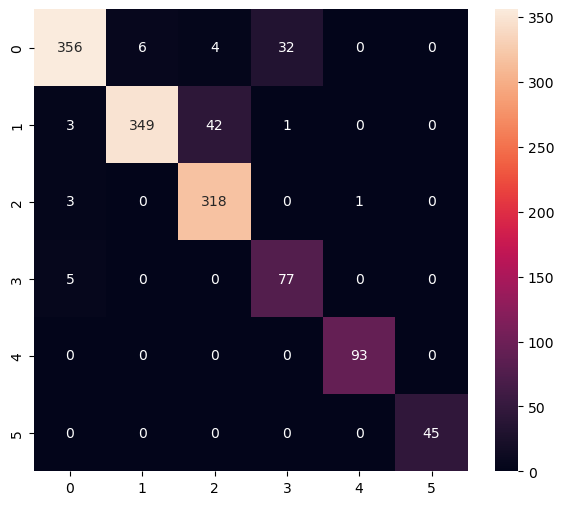

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       398
           1       0.98      0.88      0.93       395
           2       0.87      0.99      0.93       322
           3       0.70      0.94      0.80        82
           4       0.99      1.00      0.99        93
           5       1.00      1.00      1.00        45

    accuracy                           0.93      1335
   macro avg       0.92      0.95      0.93      1335
weighted avg       0.94      0.93      0.93      1335



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpeinh1gb4/assets


INFO:tensorflow:Assets written to: /tmp/tmpeinh1gb4/assets


Saved artifact at '/tmp/tmpeinh1gb4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  139752065501520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752065500368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752065500944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752065503632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752065503248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752065504400: TensorSpec(shape=(), dtype=tf.resource, name=None)


2025-03-28 09:57:56.501441: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpeinh1gb4
2025-03-28 09:57:56.501935: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-03-28 09:57:56.501945: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpeinh1gb4
2025-03-28 09:57:56.540022: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-03-28 09:57:56.560730: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpeinh1gb4
2025-03-28 09:57:56.567117: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 65676 microseconds.
2025-03-28 09:57:56.576882: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


6644

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 78 μs, sys: 72 μs, total: 150 μs
Wall time: 149 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.4234860e-02 5.8888692e-02 8.7562138e-01 7.5578352e-04 5.8495789e-05
 4.4068554e-04]
2
